In [285]:
import networkx as nx
import numpy as np

In [286]:
def get_majority_opinion(G, node):
    """
    Calculate the majority opinion of the nodes, i.e., the opinion held by the largest 
    number of individuals among the neighbors of the node.
    """
    count = {}
    for neigh in nx.neighbors(G, node):
        opinion = G.nodes[neigh]['opinion']
        count[opinion] = count.get(opinion, 0) + 1
    max_count = 0
    maj_opinion = None
    for o, c in count.items():
        if c > max_count:
            maj_opinion = o
            max_count = c  
    return maj_opinion        

In [287]:
class Simulation:
    def __init__(self, N=15, avg_degree=5, p=0.5, phi=0.5, G=3):
        self.N = N
        self.p = p
        self.phi = phi
        self.G = G
        self.time = 0
        self.graph = nx.gnp_random_graph(N, avg_degree/N)
        self.init_opinions()
    def init_opinions(self):
        """ 
        Set the opinion of all individuals in the graph. 
        All opinions are equally likely (uniform distribution).
        """
        opinions = {i: np.random.choice(self.G) for i in range(self.N)}
        nx.set_node_attributes(self.graph, opinions, 'opinion')
    def step(self):
        """ 
        One step of the simulation. Application of one of the rules to a single node. 
        """
        # choose between MA and MP according to the parameter p
        rule = np.random.binomial(1, self.p)
        # choose a random node to apply the rule to
        node = np.random.choice(nx.nodes(self.graph))
        # rule==1 -> Apply majority preference rule to node
        if rule == 1:
            maj_opinion = get_majority_opinion(self.graph, node)
            self.graph.nodes[node]['opinion'] = maj_opinion
        # rule==0 -> Apply minority avoidance rule to node
        else:  
            pass
        self.time += 1
    def stop_condition(self):
        """
        When we reach the consensus state we can stop the simulation, i.e., when each individuals
        opinion agrees with the majority of its neighbors.
        """
        return all(
                get_majority_opinion(self.graph, node) == self.graph.nodes[node]['opinion'] 
                for node in nx.nodes(self.graph)
             )
           

In [288]:
def draw(G):
    nx.draw(G, with_labels= True, node_color=list(nx.get_node_attributes(G, "opinion").values()))

[(0, 4), (0, 6), (0, 7), (0, 8), (0, 9), (1, 3), (1, 5), (1, 8), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 9), (5, 7), (6, 7), (8, 9)]
{0: 1, 1: 2, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 0, 8: 2, 9: 2}


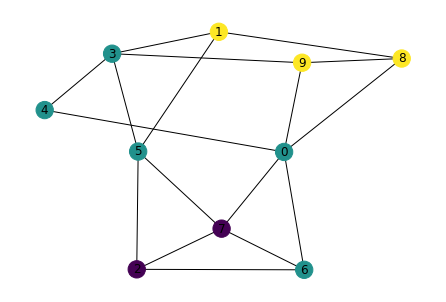

In [289]:
simul = Simulation(N=10, avg_degree=4, p=1)
G = simul.graph
print(simul.graph.edges)
print(nx.get_node_attributes(G, "opinion"))
draw(G)

{0: 1, 1: 2, 2: 0, 3: 2, 4: 1, 5: 2, 6: 1, 7: 0, 8: 2, 9: 2}


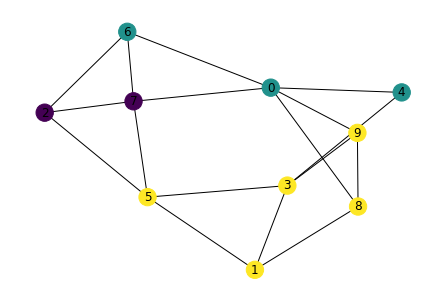

In [290]:
for _ in range(5) :
    simul.step()
print(nx.get_node_attributes(G, "opinion"))
draw(G)

33


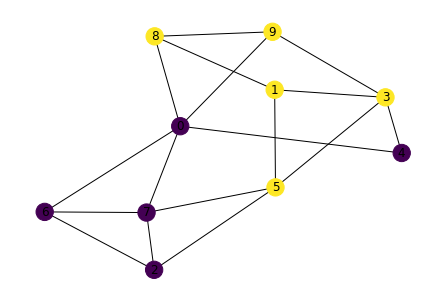

In [291]:
while(not simul.stop_condition()):
    simul.step()
draw(G)
print(simul.time)